In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('weight-height.csv')

df = df[df['Gender'] == 'Female'].drop(['Gender', 'Weight'], axis=1)

In [ ]:
# find population mean and standard deviation

mu_true = np.mean(df)
sigma_true = np.sqrt(np.sum((df - mu_true) ** 2)/len(df)).values[0]

print(f'True mean: {mu_true:.4f} \n True standard deviation: {sigma_true:.4f}')

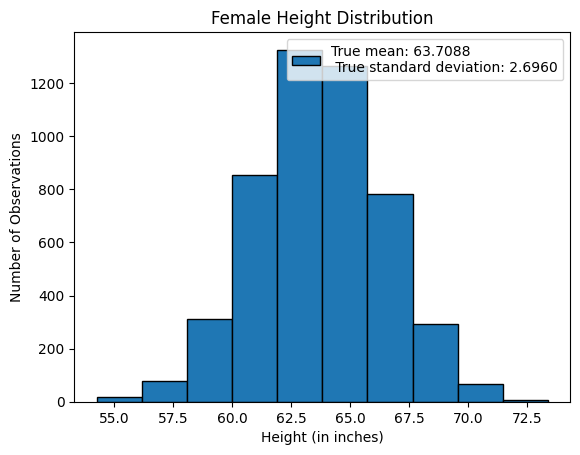

In [67]:
plt.hist(df, edgecolor='k', label=f'True mean: {mu_true:.4f} \n True standard deviation: {sigma_true:.4f}')

plt.xlabel('Height (in inches)')
plt.ylabel('Number of Observations')
plt.title('Female Height Distribution')
plt.legend()

plt.savefig('images/height_dist.png', dpi=500)
plt.show()

In [48]:
# lets say we could only take samples of size 10 from the population
# and we wanted to estimate the mean and standard deviation
# what are the best estimates?

def correct_mu(data):
    return np.mean(data)

def incorrect_mu(data):
    return np.sum(data) / (len(data) - 1)

def correct_std(data):
    return np.std(data, ddof=1)

def incorrect_std(data):
    return np.std(data, ddof=0)

# arrays for the results
mu_est_true = []
mu_est_off = []

sig_est_true = []
sig_est_off = []

trials = 1000

# sample for trials
for _ in range(trials):
    tmp_sample = df.sample(10, replace=False).values

    # calculate results
    mu_est_true.append(correct_mu(tmp_sample))
    mu_est_off.append(incorrect_mu(tmp_sample))
    sig_est_true.append(correct_std(tmp_sample))
    sig_est_off.append(incorrect_std(tmp_sample))

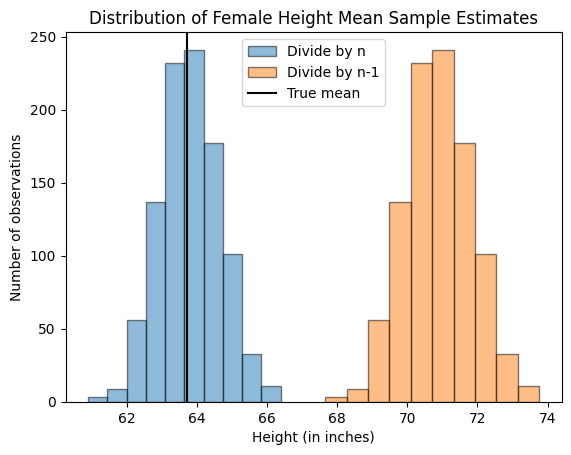

In [68]:
plt.hist(mu_est_true, alpha=0.5, label='Divide by n', edgecolor='k')
plt.hist(mu_est_off, alpha=0.5, label='Divide by n-1', edgecolor='k')
plt.axvline(mu_true, label='True mean', c='k')

plt.xlabel('Height (in inches)')
plt.ylabel('Number of observations')
plt.title('Distribution of Female Height Mean Sample Estimates')
plt.legend()

plt.savefig('images/height_mean_comparison.png', dpi=500)
plt.show()

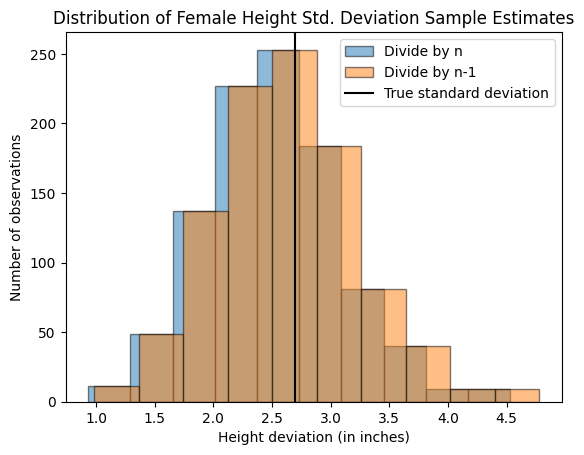

In [69]:
plt.hist(sig_est_off, alpha=0.5, label='Divide by n', edgecolor='k')
plt.hist(sig_est_true, alpha=0.5, label='Divide by n-1', edgecolor='k')
plt.axvline(sigma_true, label='True standard deviation', c='k')

plt.xlabel('Height deviation (in inches)')
plt.ylabel('Number of observations')
plt.title('Distribution of Female Height Std. Deviation Sample Estimates')
plt.legend()

plt.savefig('images/height_std_comparison.png', dpi=500)
plt.show()